#### Assignment 4. Implementing Random Search CV



In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from tqdm import tqdm
import numpy as np

x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

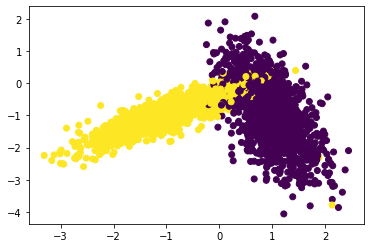

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

Implementing Custom RandomSearch CV

In [3]:
from sklearn.metrics import accuracy_score
import random 
from tqdm import tqdm
import numpy as np

def fetching_random_params(params_range):
    """This Function will return params list in a sorted order having only odd values"""
            
    odd_np_array = np.arange(1, params_range, 2)
    random_index = np.random.choice(len(odd_np_array) - 1, 10, replace=False)
    params = odd_np_array[random_index]
    params = params.tolist()
    params = sorted(params)
    return params


def random_search_cv(x_train, y_train, classifier, params, folds):
    """This function return the train_scores and test_scores after calculating for different values of k"""
    train_scores = []
    test_scores  = [] 
    params_list= fetching_random_params(params_range)
    params = {'n_neighbors': params_list}
    
    for k in tqdm(params['n_neighbors']):
        trainscores_folds = []
        testscores_folds  = []
        
        for i in range(0, folds): 
            boundary = int(len(x_train)//folds)
            test_indices=list(set(list(range((boundary * i), (boundary * (i+1))))))
            train_indices = list(set(list(range(0, len(x_train)))) - set(test_indices))
            
            X_train = x_train[train_indices]
            Y_train = y_train[train_indices]
            X_test  = x_train[test_indices]
            Y_test  = y_train[test_indices]

            classifier.n_neighbors = k
            classifier.fit(X_train,Y_train)

            Y_predicted = classifier.predict(X_test)
            testscores_folds.append(accuracy_score(Y_test, Y_predicted))

            Y_predicted = classifier.predict(X_train)
            trainscores_folds.append(accuracy_score(Y_train, Y_predicted))
        train_scores.append(np.mean(np.array(trainscores_folds)))
        test_scores.append(np.mean(np.array(testscores_folds)))
    return train_scores,test_scores,params

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:08<00:00,  1.22it/s]

params: {'n_neighbors': [1, 3, 5, 13, 17, 21, 25, 27, 29, 37]}
train_scores: [1.0, 0.968, 0.9624666666666667, 0.9592, 0.9575333333333335, 0.9572666666666666, 0.9575999999999999, 0.9573999999999999, 0.9578000000000001, 0.9579333333333334]
test_scores: [0.9296000000000001, 0.9464, 0.9495999999999999, 0.9544, 0.9545333333333333, 0.9541333333333334, 0.9541333333333334, 0.9538666666666668, 0.9550666666666667, 0.9556]


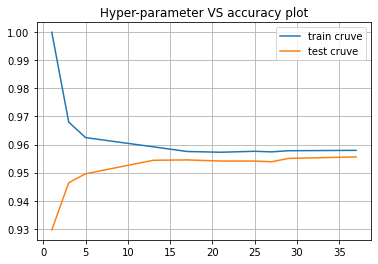

In [4]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")
neigh = KNeighborsClassifier()
params_range = 50
folds = 3
train_scores, test_scores, params = random_search_cv(X_train, y_train, neigh, params_range, folds)
print('params:', params)
print("train_scores:",train_scores)
print("test_scores:",test_scores)
plt.plot(params['n_neighbors'],train_scores, label='train cruve')
plt.plot(params['n_neighbors'],test_scores, label='test cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.grid()
plt.show()

In [5]:

def plot_decision_boundary(X1, X2, y, clf):
    """referenced from assignment 4.Refence"""
        
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

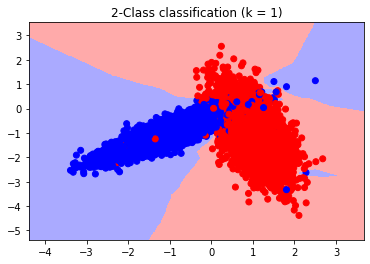

In [6]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 1)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)

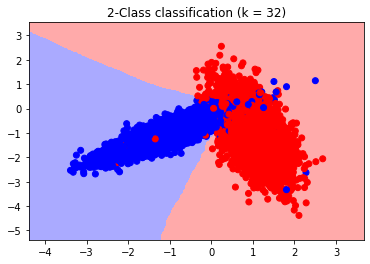

In [7]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 32)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)

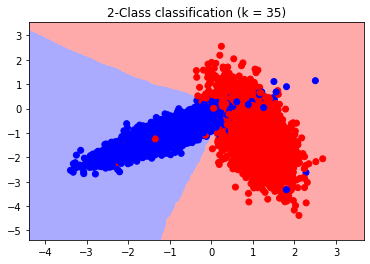

In [9]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 35)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)